In [1]:
import requests
import seaborn as sns
import pandas as pd
import graph_tool.all as gt
import networkx as nx
import zipfile

# Hands-on Three python libraries

- Pandas: Main python library dealing with tables.
- Networkx: Complete python library dealing with networks.
- Graph-tool: Python library dealing with networks **fast**.

<center><img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" alt="Drawing" style="width: 350px;"/></center>

<center><img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/1920px-NumPy_logo_2020.svg.png" alt="Drawing" style="width: 350px;"/></center>

In [2]:
import numpy as np
# Main class of numpy -> the array

int_array = np.array([1, 2, 3, 4])
float_array = np.array([1., 2., 3., 4.])
string_array = np.array(['ad', 'sb',
                         'sac', 'a'])

In [3]:
A = np.array([[1, 2], [3, 4]])
print(A * 4)

[[ 4  8]
 [12 16]]


In [4]:
import pandas as pd
# Create a pandas dataframe

df = pd.DataFrame({'col_a': int_array,
                   'col_b': float_array,
                   'colb_c': string_array})
print(df)

   col_a  col_b colb_c
0      1    1.0     ad
1      2    2.0     sb
2      3    3.0    sac
3      4    4.0      a


In [5]:
# Two types of objects in pandas:
# Series and DataFrame
df['col_a'] * 4

0     4
1     8
2    12
3    16
Name: col_a, dtype: int64

In [6]:
# Creating new columns
df['new_col'] = [9, 8, 7, 6]
print(df)

   col_a  col_b colb_c  new_col
0      1    1.0     ad        9
1      2    2.0     sb        8
2      3    3.0    sac        7
3      4    4.0      a        6


In [7]:
# The apply method
def potencia(x):
    return x**3

df['col_b'].apply(potencia)

0     1.0
1     8.0
2    27.0
3    64.0
Name: col_b, dtype: float64

In [8]:
thrones = pd.read_json(
    "https://raw.githubusercontent.com/jeffreylancaster/game-of-thrones/master/data/costars.json")
thrones.head()

,tt4699982,tt5539140,tt2006040,tt1316616,tt0810823,tt1043496,tt0472160,tt0481459,tt0338806,tt0362192,...,tt0181712,tt0095320,tt0121757,tt0095022,tt0124035,tt1611815,tt0092153,tt0088970,tt0085922,tt0367119
imdb_id,tt4699982,tt5539140,tt2006040,tt1316616,tt0810823,tt1043496,tt0472160,tt0481459,tt0338806,tt0362192,...,tt0181712,tt0095320,tt0121757,tt0095022,tt0124035,tt1611815,tt0092153,tt0088970,tt0085922,tt0367119
title,Rebellion,Joan of Arc: God's Warrior,A Fantastic Fear of Everything,There Be Dragons,The Deaths of Ian Stone,Sinking of the Lusitania: Terror at Sea,Penelope,The Virgin Queen,Warrior Queen,State of Play,...,Najbolji,Honor Bound,Sokol ga nije volio,The Dirty Dozen: The Fatal Mission,Oficir s ruzom,Bunda,Vecernja zvona,Crveni i crni,Medeni mjesec,Tamburasi
year,2016,2015,2012,2011,2007,2007,2006,2006,2003,2003,...,1989,1988,1988,1988,1987,1987,1986,1985,1983,1982
actors,"[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...","[{'personID': 'nm0269923', 'actorName': 'Micha...",...,"[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk...","[{'personID': 'nm0432838', 'actorName': 'Slavk..."


In [9]:
thrones = thrones.T
thrones.head()

,imdb_id,title,year,actors
tt4699982,tt4699982,Rebellion,2016,"[{'personID': 'nm0269923', 'actorName': 'Micha..."
tt5539140,tt5539140,Joan of Arc: God's Warrior,2015,"[{'personID': 'nm0269923', 'actorName': 'Micha..."
tt2006040,tt2006040,A Fantastic Fear of Everything,2012,"[{'personID': 'nm0269923', 'actorName': 'Micha..."
tt1316616,tt1316616,There Be Dragons,2011,"[{'personID': 'nm0269923', 'actorName': 'Micha..."
tt0810823,tt0810823,The Deaths of Ian Stone,2007,"[{'personID': 'nm0269923', 'actorName': 'Micha..."


In [10]:
# Lets look into row 1 column 3
print("- first method\n",
      thrones.iloc[0,3])
# Or row 'tt5539140' columns 'actors'
print("- second method\n",
      thrones.loc['tt5539140', 'actors'])

- first method
 [{'personID': 'nm0269923', 'actorName': 'Michael Feast', 'characterName': 'Aeron Greyjoy'}, {'personID': 'nm0568400', 'actorName': 'Ian McElhinney', 'characterName': 'Barristan Selmy'}, {'personID': 'nm0265610', 'actorName': 'Michelle Fairley', 'characterName': 'Catelyn Stark'}, {'personID': 'nm0734498', 'actorName': 'Lalor Roddy', 'characterName': 'Catspaw Assassin'}, {'personID': 'nm5697839', 'actorName': 'Jed Murray', 'characterName': 'Northman Rioter'}, {'personID': 'nm6316115', 'actorName': 'Ruairí Heading', 'characterName': "Night's Watchman #2"}, {'personID': 'nm4335246', 'actorName': 'Faolan Morga', 'characterName': 'Stark Guard'}, {'personID': 'nm1788152', 'actorName': 'Brendan McCormack', 'characterName': 'Vardis Egen'}, {'personID': 'nm2228622', 'actorName': 'Marcus Lam', 'characterName': "Night's Watchman"}]
- second method
 [{'personID': 'nm0269923', 'actorName': 'Michael Feast', 'characterName': 'Aeron Greyjoy'}]


In [11]:
# Get one row for each actor
thrones = thrones.explode('actors')
thrones.head()

,imdb_id,title,year,actors
tt4699982,tt4699982,Rebellion,2016,"{'personID': 'nm0269923', 'actorName': 'Michae..."
tt4699982,tt4699982,Rebellion,2016,"{'personID': 'nm0568400', 'actorName': 'Ian Mc..."
tt4699982,tt4699982,Rebellion,2016,"{'personID': 'nm0265610', 'actorName': 'Michel..."
tt4699982,tt4699982,Rebellion,2016,"{'personID': 'nm0734498', 'actorName': 'Lalor ..."
tt4699982,tt4699982,Rebellion,2016,"{'personID': 'nm5697839', 'actorName': 'Jed Mu..."


In [12]:
def get_actor_id(x):
    return x['personID']

def get_actor_name(x):
    return x['actorName']

thrones['id'] = thrones['actors'].apply(
    get_actor_id)
thrones['name'] = thrones['actors'].apply(
    get_actor_name)
# get characterName using lambda?
thrones['character'] = (thrones['actors']
                        .apply(
                            lambda x: x['characterName']))
thrones.columns

Index(['imdb_id', 'title', 'year', 'actors', 'id', 'name', 'character'], dtype='object')

In [13]:
thrones = thrones.drop('actors', axis=1)
thrones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7363 entries, tt4699982 to tt0367119
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imdb_id    7363 non-null   object
 1   title      7363 non-null   object
 2   year       6320 non-null   object
 3   id         7363 non-null   object
 4   name       7363 non-null   object
 5   character  7363 non-null   object
dtypes: object(6)
memory usage: 402.7+ KB


In [14]:
thrones['year'].unique()

array(['2016', '2015', '2012', '2011', '2007', '2006', '2003', '2002',
       '2001', '2000', '1999', '1998', '1993', '1990', '1989', '1988',
       '1986', '1983', '1982', '1980', '1979', '1977', '1974', '1972',
       '1971', '1970', '', '2008', '2005', '2004', '1997', '1996', '1995',
       '1987', '1985', '1984', '2016/I', '2015/II', '2014', '2014/II',
       '2009', '2016/IV', '2013', '1991', nan, '2000/I', '1994', '2010',
       '1981', '1978', '1976', '1975', '2019', '2015/I', '2010/I',
       '2009/I', '1992', '2017', '2018', '2001/I', '2010/II', '2015-2016',
       '2013/I', '2010/IV', '2008/II', '2005/II', '2017/III', '2012/I',
       '2016/II', '2017/II', '2014/I', '2012/II', '2011/III', '2008/III',
       '2008/I', '2013/III', '2005/I', '1965', '2013/II', '2012/III',
       '2003/II', '1988-1989', '1973', '1969', '1966', '1962', '2015/IV',
       '2011/I', '1996/II', '2017/I', '2018/II', '2011/IV', '2006/II',
       '2014-2016', '2014/III', '2012/V', '2009/II', '2003/III', 

In [15]:
def get_year(x):
    # string vacío
    if x == '':
        return np.nan
    if x is np.nan:
        return x
    return int(x[:4])

In [16]:
thrones['year'] = (thrones['year'].
                   apply(get_year))
thrones['year'].head()

tt4699982    2016.0
tt4699982    2016.0
tt4699982    2016.0
tt4699982    2016.0
tt4699982    2016.0
Name: year, dtype: float64

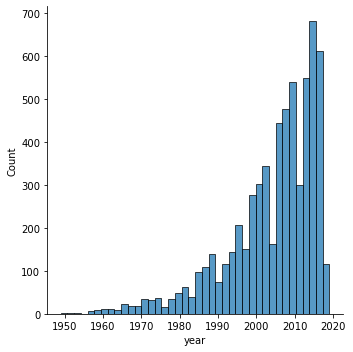

In [17]:
### Yearly distribution of movies with
# GoT cast.
import seaborn as sns

sns.displot(thrones['year'], bins=40)

In [18]:
thrones['year'].describe()

count    6246.000000
mean     2004.073167
std        11.650196
min      1949.000000
25%      1998.000000
50%      2007.000000
75%      2013.000000
max      2019.000000
Name: year, dtype: float64

# Let's make a co-star network!

Need to know about `groupby` method and some other functions.

In [19]:
# Create a new DataFrame
df = pd.DataFrame(
    {'col1': [1, 1, 1, 2, 2, 3],
     'col2': ['a', 'b', 'c', 'b', 'c', 'a']})
df

,col1,col2
0,1,a
1,1,b
2,1,c
3,2,b
4,2,c
5,3,a


In [21]:
# Groupby column1 and aggregate using
# first finding of columns 2.

df.groupby('col1')['col2'].first()

col1
1    a
2    b
3    a
Name: col2, dtype: object

In [22]:
from itertools import combinations

my_list = [1, 2, 3, 4]
list(combinations(my_list, 2))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [23]:
# Use combinations, and explode to get a tuple for each
df.groupby('col1')['col2'].apply(lambda x: tuple(sorted(combinations(x, 2)))).explode()

col1
1    (a, b)
1    (a, c)
1    (b, c)
2    (b, c)
3       NaN
Name: col2, dtype: object

In [24]:
edgelist = thrones.groupby('imdb_id')['id'].apply(
    lambda x: tuple(sorted(combinations(x, 2)))).explode()

In [26]:
edgelist.to_csv('../data/edgelist_got.csv', index=False)
thrones.to_csv('../data/got.csv', index=False)

### Hasta aquí llegamos en clase

In [25]:
edgelist = edgelist.dropna()
edgelist.head()

imdb_id
tt0056696    (nm0574534, nm0822062)
tt0063728    (nm0234541, nm0891092)
tt0064000    (nm0002103, nm0891092)
tt0064072    (nm0574534, nm0181920)
tt0065292    (nm0822062, nm0838910)
Name: id, dtype: object

In [ ]:
df_adj = pd.DataFrame()

df_adj['source'] = edgelist.str[0]
df_adj['target'] = edgelist.str[1]

df_adj.head()

In [ ]:
df_adj = df_adj.groupby(['source', 'target']).size().rename('weight').reset_index()

# Let's use networkx and graph-tool

In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(df_adj,
                            source='source',
                            target='target',
                            edge_attr='weight')
print(nx.number_connected_components(G))

In [ ]:
import graph_tool.all as gt

g = gt.Graph(directed=False)

In [ ]:
# Edges and nodes have "properties"
weight = g.new_edge_property("int")
# Get numpy array using attribute
# 'values'.
edges = df_adj.values
# Create a graph in graph-tool
ids = g.add_edge_list(edges,
                      hashed=True,
                      hash_type='string',
                      eprops=[weight])

In [ ]:
# Use  layout
pos = gt.arf_layout(g)
# Create another graph only containing largest component
h = gt.GraphView(g, vfilt=gt.label_largest_component(g))

In [ ]:
# Draw
gt.graph_draw(h, edge_pen_width=weight, pos=pos)

In [ ]:
core = nx.core.k_core(G)
print(core.nodes)

In [ ]:
core_nodes = thrones[thrones['id'].isin(core.nodes)]
core_nodes['name'].unique()

# References

- Cleaning data with pandas: https://realpython.com/python-data-cleaning-numpy-pandas/
- Groupby: https://realpython.com/pandas-groupby/
- Graph-tool: https://graph-tool.skewed.de/static/doc/quickstart.html
- Pandas reference: Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (Teams)